<a href="https://colab.research.google.com/github/abkohen/gestion-de-datos-proyecto/blob/main/Market_basket_analysis_datascience_uai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rules <br>
Tipo de modelo no supervisados que permite reconocer relaciones entre Items. Funciona al buscar combinaciones de items que aparecen frecuentemente en las transacciones. Uso de reglas de asosación como herramienta para lograr la fidelización de los consumidores.

* $I = {i_1, i_2, \ldots, i_n}$ es un set de items.
* $T = {t_1, t_2, \ldots, t_m}$ es un set de transacciones.

Cada transacción $t_m$ contiene un conjunto de items $i_n$

De esta forma, las reglas se definen cómo:<br>
$X \rightarrow Y$, donde $X, Y \subseteq I$


**Algoritmo Apriori** <br>
Permite reducir el tiempo requerido para crear reglas de asociación al restringir ciertos conjuntos de productos que tienen una baja frecuencia de apariciones entre los datos.<br>

*Ejemplo (Fuente: https://youtu.be/guVvtZ7ZClw?si=J35HqVKcDCuHrqDe)* <br>
Se establece un soporte mínimo de 2 apariciones para generar reglas de asociación a partir del siguiente conjunto de datos: <br>
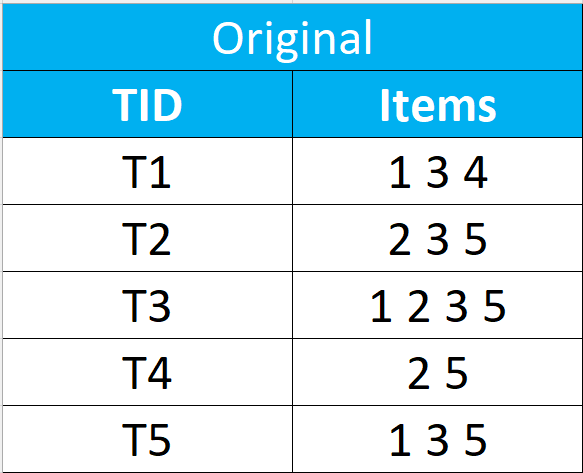


Paso 1: Se construyen sets de tamaño 1. Luego, filtramos aquellos que no cumplan con el soporte mínimo.
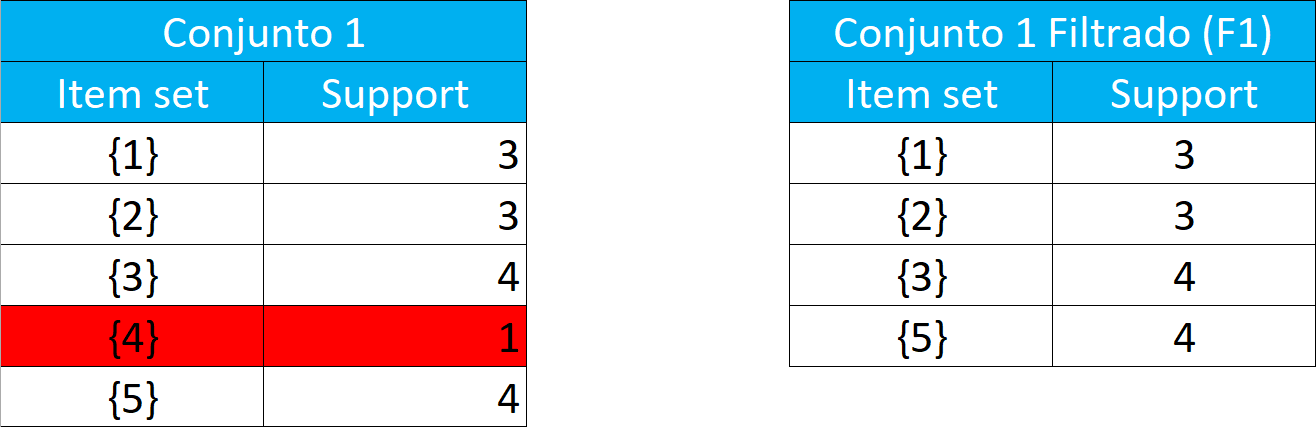

Paso 2: Se construyen sets de tamaño 2. Luego, filtramos aquellos que no cumplan con el soporte mínimo.

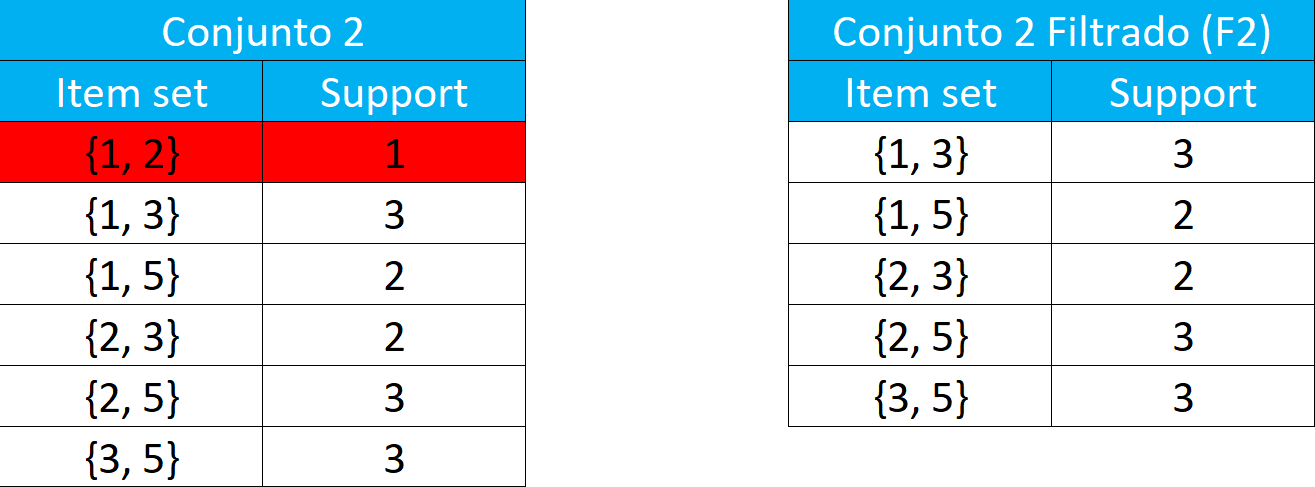

Paso 3: Se construyen sets de tamaño 3. Luego, filtramos aquellos que no cumplan con el soporte mínimo. Se puede reconocer qué sets no continuan utilizanzo dos métodos

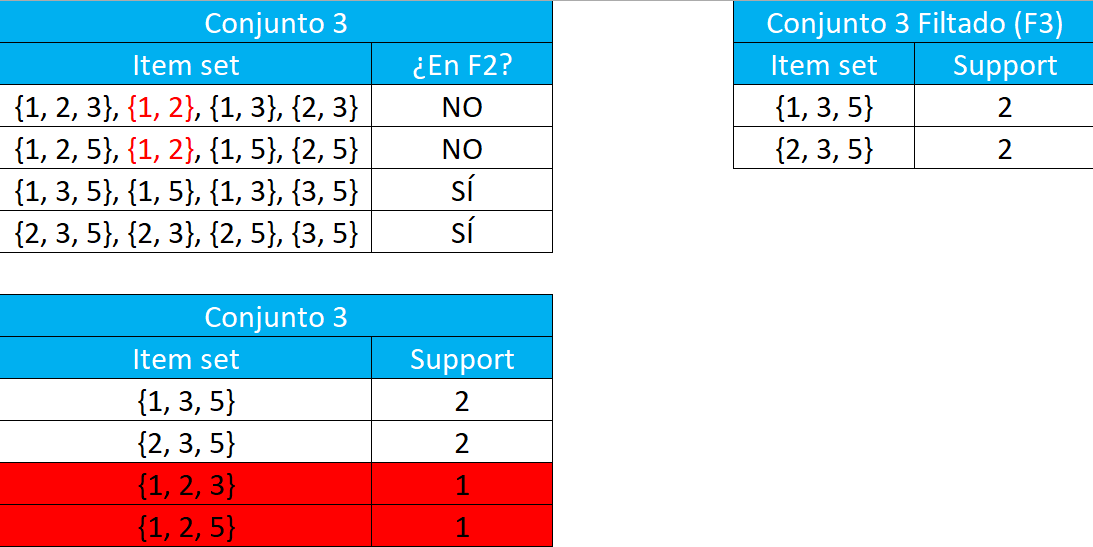

Paso 4: Se construyen sets de tamaño 4...

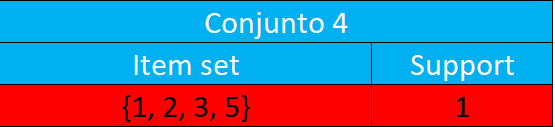

Paso 5: Creamos las reglas de asociación a partir de la tabla F3.
* {1, 3} $\rightarrow$ {5}
* {1} $\rightarrow$ {3, 5} <br>
$\vdots$ <br>
* {3, 5} $\rightarrow$ {2}<br>

Luego podemos calcular las métricas asociadas para evaluar el grado de relación.


**Métricas**

1. **Support (Soporte)**: Muestra la popularidad de un conjunto de ítems, medida por la proporción de transacciones en las que aparece el conjunto de ítems.

    $Support( X) =\frac{N° \ de\ transacciones\ en\ las\ que\ aparece\ X}{N° \ Total\ de\ transacciones}$
    
    Tenemos las siguientes transacciones en un supermercado: <br>
    {leche, aceite, bebida}, {bebida, huevos}, {aceite, huevos}, <br/>
    {cerveza, bebida}, {leche,huevos, bebida}, {leche, aceite}, <br/>
    {huevos, cerveza}, {leche, aceite, bebida}, {bebida}, <br/>
    {leche, huevos, bebida, cerveza}

**Calcule** el soporte para cada una de estas reglas: (Leche $\rightarrow$ Bebida); (Bebida $\rightarrow$ aceite, leche); ( Bebida $\rightarrow$ Cerveza)

   
  * 4/10
  * 2/10
  * 2/10




2. **Confidence (Confianza)**: Es una medida de la probabilidad de que se compre el consecuente cuando se compra el antecedente.  Se mide por la proporción de transacciones con el antecedente, en las que también aparece el consecuente. Por ejemplo, si la confianza de la regla {Pañales} $\rightarrow$ {Cerveza} es 0.5, entonces los clientes que compraron pañales también compraron cerveza en el 50% de los casos. La confianza no es indicativo de una regla fuerte por sí misma y debe usarse junto con otras métricas como el lift.

    $Confidence\left( A\ \rightarrow B\ \right) =\frac{N° \ de\ transacciones\ que\ llevan\ A\ y\ B}{N° \ de\ transacciones\ que\ llevan\ A}$ <br>

    Tenemos las siguientes transacciones en un supermercado: <br>
    {leche, aceite, bebida}, {bebida, huevos}, {aceite, huevos}, <br/>
    {cerveza, bebida},{leche,huevos, bebida}, {leche, aceite}, <br/>
    {huevos, cerveza}, {leche, aceite, bebida}, {bebida}, <br/>
    {leche, huevos, bebida, cerveza} <br>
    
**Calcule** la confianza para cada una de estas reglas: (Leche $\rightarrow$ Bebida); (Bebida $\rightarrow$ aceite, leche); ( Bebida $\rightarrow$ Cerveza)

   
   * 4/5
   * 2/7
   * 2/7

3. **Lift (Elevación o Ganancia)**: Indica la fuerza de una regla sobre la ocurrencia aleatoria del antecedente y el consecuente.

    $Lift\left( A\ \rightarrow B\right) =\ \ \frac{Support\left( A\rightarrow B\right)}{Support( A) \cdotp Support( B)} =\frac{Confidence\left( A\rightarrow B\right)}{Support( B)}$

    $Lift < 1$ es un indicativo de que es más probable que los produtos se adquieran por separados.

    $Lift > 1$ es un indicativo de que es más probable que los produtos se adquieran en conjunto.

    Tenemos las siguientes transacciones en un supermercado:<br>
    {leche, aceite, bebida}, {bebida, huevos}, {aceite, huevos}, <br/>
    {cerveza, bebida},{leche,huevos, bebida}, {leche, aceite}, <br/>
    {huevos, cerveza}, {leche, aceite, bebida}, {bebida}, <br/>
    {leche, huevos, bebida, cerveza}

**Calcule** el lift para cada una de estas reglas: (Leche $\rightarrow$ Bebida); (Bebida $\rightarrow$ aceite, leche); (Bebida $\rightarrow$ Cerveza) <br>
    
    
* 4/5 / 7/10 → 40/35 ≈ 1.14
* 2/7 / 3/10 → 20/21 ≈ 0.95
* 2/7 / 3/10 → 20/21 ≈ 0.95


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

df =  pd.read_csv('Boletas_sublinea_20000_ok.csv', sep=';')
df = df.drop(columns=['Etiquetas de fila'])

print("Dimensión de las base de datos: ", df.shape)

df.head(n = 10)
#print(df)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Dimensión de las base de datos:  (19999, 278)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,CUADERNO ESCOLAR,ACEITE DE MARAVILLA,ACEITE DE OLIVA,ACEITE PEPITA DE UVA,ACEITE VEGETAL,ACEITUNAS,ADHESIVOS,AGUARDIENTE,AGUAS,AJI,...,VERDURAS,VERDURAS CONGELADAS,VERMOUTH,VIENESAS,VINAGRES,VINOS,VIRUTILLAS,WHISKY,YERBA MATE GRANEL,YOGHURT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
print(df)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

        CUADERNO ESCOLAR  ACEITE DE MARAVILLA  ACEITE DE OLIVA  \
0                      0                    0                0   
1                      0                    0                0   
2                      0                    0                0   
3                      0                    0                0   
4                      0                    0                0   
...                  ...                  ...              ...   
19994                  0                    0                0   
19995                  0                    0                0   
19996                  0                    0                0   
19997                  0                    0                0   
19998                  0                    0                0   

       ACEITE PEPITA DE UVA  ACEITE VEGETAL  ACEITUNAS  ADHESIVOS  \
0                         0               0          0          0   
1                         0               1          0          0   


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
rules = rules.sort_values('support', ascending=False)
rules

NameError: name 'rules' is not defined

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
soporte_min = 500/df.shape[0] #parametro soporte minimo (en este caso se utilizó el minimo relativo)
frequent_itemsets = apriori(df, min_support = soporte_min, use_colnames = True, max_len = 4)
frequent_itemsets

,support,itemsets
0,0.025301,(ACEITE DE MARAVILLA)
1,0.162408,(ACEITE VEGETAL)
2,0.047102,(AGUAS)
3,0.034602,(ARROZ PREGRANEADO)
4,0.153458,(ARROZ REGULAR)
...,...,...
1594,0.027801,"(LECHES LIQUIDAS, YOGHURT, NECTARES LIQUIDOS, ..."
1595,0.026351,"(LECHES LIQUIDAS, YOGHURT, NECTARES LIQUIDOS, ..."
1596,0.026151,"(SALSAS DE TOMATE, YOGHURT, LECHES LIQUIDAS, P..."
1597,0.028401,"(LECHES LIQUIDAS, YOGHURT, QUESOS, SALSAS DE T..."


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold = 0)
print("Número de reglas: ", rules.shape[0])

rules.head(5)

Número de reglas:  10116


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ARROZ REGULAR),(ACEITE VEGETAL),0.153458,0.162408,0.083804,0.546106,3.362555,1.0,0.058881,1.845348,0.829973,0.361129,0.458097,0.531058
1,(ACEITE VEGETAL),(ARROZ REGULAR),0.162408,0.153458,0.083804,0.516010,3.362555,1.0,0.058881,1.749090,0.838842,0.361129,0.428274,0.531058
2,(ATUN),(ACEITE VEGETAL),0.084004,0.162408,0.038702,0.460714,2.836769,1.0,0.025059,1.553151,0.706866,0.186326,0.356147,0.349507
3,(ACEITE VEGETAL),(ATUN),0.162408,0.084004,0.038702,0.238300,2.836769,1.0,0.025059,1.202568,0.773033,0.186326,0.168447,0.349507
4,(AZUCAR GRANULADA),(ACEITE VEGETAL),0.180459,0.162408,0.096155,0.532835,3.280837,1.0,0.066847,1.792924,0.848279,0.389745,0.442252,0.562446


In [ ]:
rules = rules.sort_values('confidence', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10048,"(LECHES LIQUIDAS, NECTARES LIQUIDOS, POSTRES R...",(YOGHURT),0.031952,0.306515,0.027801,0.870110,2.838715,1.0,0.018008,5.338996,0.669107,0.089490,0.812699,0.480406
9641,"(SALSAS DE TOMATE, FIDEO CORTO, POSTRES REFRIG...",(YOGHURT),0.029601,0.306515,0.025501,0.861486,2.810582,1.0,0.016428,5.006621,0.663853,0.082099,0.800264,0.472342
9978,"(GALLETAS DULCES, NECTARES LIQUIDOS, POSTRES R...",(YOGHURT),0.032802,0.306515,0.028101,0.856707,2.794990,1.0,0.018047,4.839638,0.663997,0.090296,0.793373,0.474194
9935,"(LECHES LIQUIDAS, GALLETAS DULCES, POSTRES REF...",(YOGHURT),0.037152,0.306515,0.031802,0.855989,2.792647,1.0,0.020414,4.815506,0.666685,0.101972,0.792337,0.479871
9279,"(FIDEO CORTO, FIDEO LARGO, MAYONESA)",(SALSAS DE TOMATE),0.029451,0.171559,0.025201,0.855688,4.987728,1.0,0.020149,5.740612,0.823769,0.143345,0.825803,0.501292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,(YOGHURT),"(LECHES LIQUIDAS, GALLETAS DULCES, PAPEL HIGIE...",0.306515,0.032852,0.025151,0.082055,2.497758,1.0,0.015082,1.053602,0.864678,0.080045,0.050875,0.423828
9819,(YOGHURT),"(SALSAS DE TOMATE, NECTARES LIQUIDOS, FIDEO LA...",0.306515,0.032252,0.025101,0.081892,2.539170,1.0,0.015216,1.054069,0.874094,0.080026,0.051295,0.430093
4350,(YOGHURT),"(VERDURAS CONGELADAS, FIDEO LARGO)",0.306515,0.036302,0.025101,0.081892,2.255874,1.0,0.013974,1.049657,0.802776,0.079005,0.047308,0.386676
4722,(YOGHURT),"(SALSAS DE TOMATE, LAVALOZAS)",0.306515,0.038052,0.025051,0.081729,2.147835,1.0,0.013388,1.047565,0.770622,0.078404,0.045405,0.370037


In [ ]:
rules = rules.sort_values('lift', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
635,(MAYONESA),(KETCHUP),0.083804,0.043002,0.027251,0.325179,7.561924,1.0,0.023648,1.418151,0.947132,0.273732,0.294856,0.479450
634,(KETCHUP),(MAYONESA),0.043002,0.083804,0.027251,0.633721,7.561924,1.0,0.023648,2.501360,0.906751,0.273732,0.600217,0.479450
8356,"(AZUCAR GRANULADA, FIDEO CORTO)","(SAL DE MESA, FIDEO LARGO)",0.091455,0.046252,0.029351,0.320940,6.938905,1.0,0.025121,1.404512,0.942039,0.270881,0.288009,0.477767
8361,"(SAL DE MESA, FIDEO LARGO)","(AZUCAR GRANULADA, FIDEO CORTO)",0.046252,0.091455,0.029351,0.634595,6.938905,1.0,0.025121,2.486404,0.897391,0.270881,0.597813,0.477767
8598,"(AZUCAR GRANULADA, FIDEO CORTO)","(SALSAS DE TOMATE, SAL DE MESA)",0.091455,0.046602,0.029501,0.322581,6.921985,1.0,0.025239,1.407397,0.941651,0.271764,0.289468,0.477814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,(FIDEO LARGO),(BEBIDAS GASEOSAS),0.154708,0.150008,0.027401,0.177117,1.180721,1.0,0.004194,1.032945,0.181073,0.098810,0.031894,0.179892
168,(AZUCAR GRANULADA),(BEBIDAS GASEOSAS),0.180459,0.150008,0.031302,0.173455,1.156311,1.0,0.004231,1.028368,0.164946,0.104630,0.027586,0.191061
169,(BEBIDAS GASEOSAS),(AZUCAR GRANULADA),0.150008,0.180459,0.031302,0.208667,1.156311,1.0,0.004231,1.035646,0.159037,0.104630,0.034419,0.191061
279,(BEBIDAS GASEOSAS),(YOGHURT),0.150008,0.306515,0.053153,0.354333,1.156005,1.0,0.007173,1.074060,0.158769,0.131771,0.068953,0.263871


In [ ]:

import plotly.express as px
import pandas as pd

fig = px.scatter(rules, x="support", y="confidence", color="lift",
                 hover_name=rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str),
                 labels={"support": "Support", "confidence": "Confidence", "lift": "Lift"})

fig.show()